In [68]:
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
file = open('../../scraping/iihs_crashratings/iihsratings2017', 'rb')
iihs_rating = pickle.load(file)

In [70]:
file = open('../../scraping/iihs_death/iihsdeath2017', 'rb')
iihs_deaths = pickle.load(file)

In [71]:
iihs_join_raw = iihs_deaths.join(iihs_rating, lsuffix='_l', rsuffix='_r')
iihs_join = iihs_join_raw[['death_rate','small_overlap_driver','curb_weight']]

In [72]:
# rid of one model outlier
iihs_join.loc[3,'death_rate'] = None

In [73]:
iihs_join = iihs_join.dropna()
iihs_join['curb_weight'] = iihs_join['curb_weight'].apply(lambda x: x.replace(',',''))

In [74]:

iihs_join = iihs_join.astype({'death_rate':'int64', 'curb_weight':'int64'})
iihs_join.dtypes

death_rate               int64
small_overlap_driver    object
curb_weight              int64
dtype: object

In [75]:
iihs_join['curb_weight^2'] = iihs_join['curb_weight']**2

In [76]:
dummy_iihs = pd.get_dummies(iihs_join)

In [77]:
X = pd.get_dummies(iihs_join[['curb_weight^2','curb_weight','small_overlap_driver']])
y = iihs_join['death_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [78]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3400439928184835

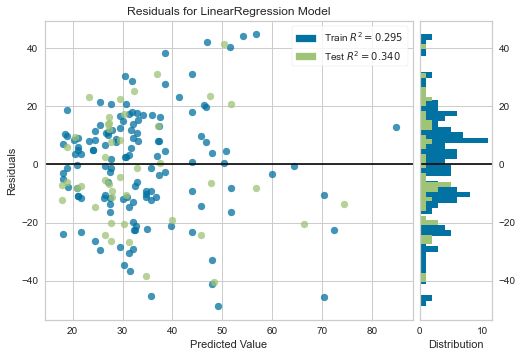

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [79]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [80]:
(y - model.predict(X)).sort_values(ascending=False).tail(10)

80   -28.903569
58   -30.543838
59   -30.991526
91   -31.016611
4    -38.547713
50   -40.474906
88   -41.380654
5    -42.001312
48   -44.218746
7    -44.780316
Name: death_rate, dtype: float64

In [81]:
coef_list = list(zip(X.columns, model.coef_))
coef_list

[('curb_weight^2', 7.5719788024793695e-06),
 ('curb_weight', -0.07312419056909197),
 ('small_overlap_driver_A', 0.8579640053659704),
 ('small_overlap_driver_G', -7.546661099247769),
 ('small_overlap_driver_M', 1.6525144891342745),
 ('small_overlap_driver_P', 5.036182604747598)]

In [82]:
model.intercept_

201.70740818164873

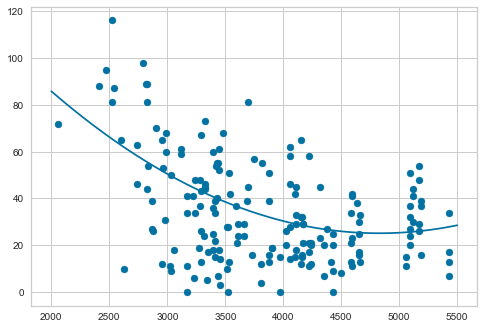

In [85]:
# Create the vectors X and Y
x_sim = np.array(range(2000, 5500))
y_sim = model.coef_[0] * (x_sim ** 2) + model.coef_[1] * x_sim + model.intercept_

# Create the plot
plt.plot(x_sim,y_sim)
plt.scatter(X['curb_weight'],y)

# Show the plot
plt.show()